/var/folders/2q/12b4f17x1q988bs0nxprb7pm0000gn/T/ipykernel_20042/361956760.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download('AAPL', start = '2024-01-01', end= '2025-07-14')
[*********************100%***********************]  1 of 1 completed


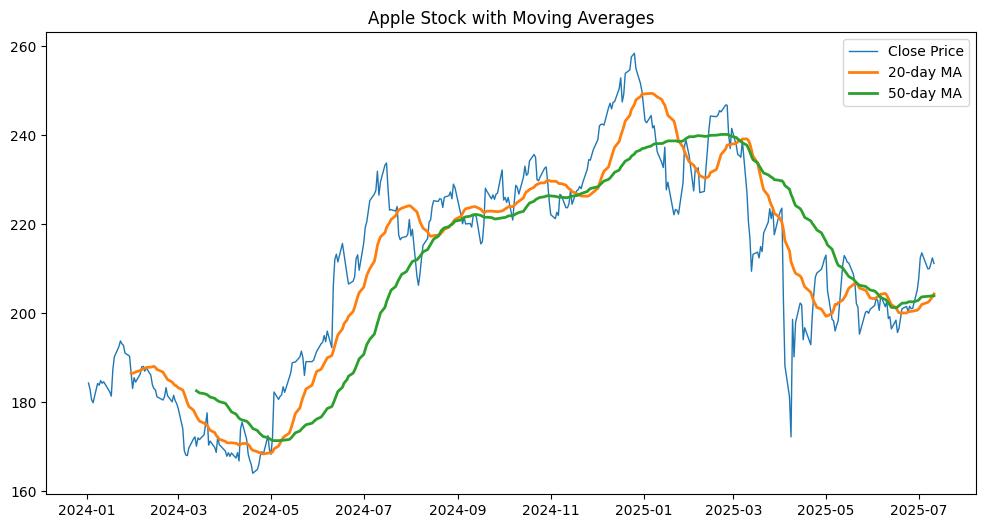

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
# Get stock data
stock = yf.download('AAPL', start = '2024-01-01', end= '2025-07-14')

# Calculate moving averages
stock['MA_20'] = stock['Close'].rolling(window=20).mean()
stock['MA_50'] = stock['Close'].rolling(window=50).mean()

# Plot everything
plt.figure(figsize=(12,6))
plt.plot(stock['Close'], label='Close Price', linewidth=1)
plt.plot(stock['MA_20'], label='20-day MA', linewidth=2)
plt.plot(stock['MA_50'], label= '50-day MA', linewidth=2)
plt.legend()
plt.title('Apple Stock with Moving Averages')
plt.show()

/var/folders/2q/12b4f17x1q988bs0nxprb7pm0000gn/T/ipykernel_20042/162004716.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download('AAPl', start= '2024-01-01', end= '2025-07-14')
[*********************100%***********************]  1 of 1 completed
/var/folders/2q/12b4f17x1q988bs0nxprb7pm0000gn/T/ipykernel_20042/162004716.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['Signal'][stock['MA_20'] > stock['MA_50']] = 1
/var/folders/2q/12b4f17x1q988bs0nxprb7pm0000gn/T/ipykernel_20042/162004716.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['Signal'][sto

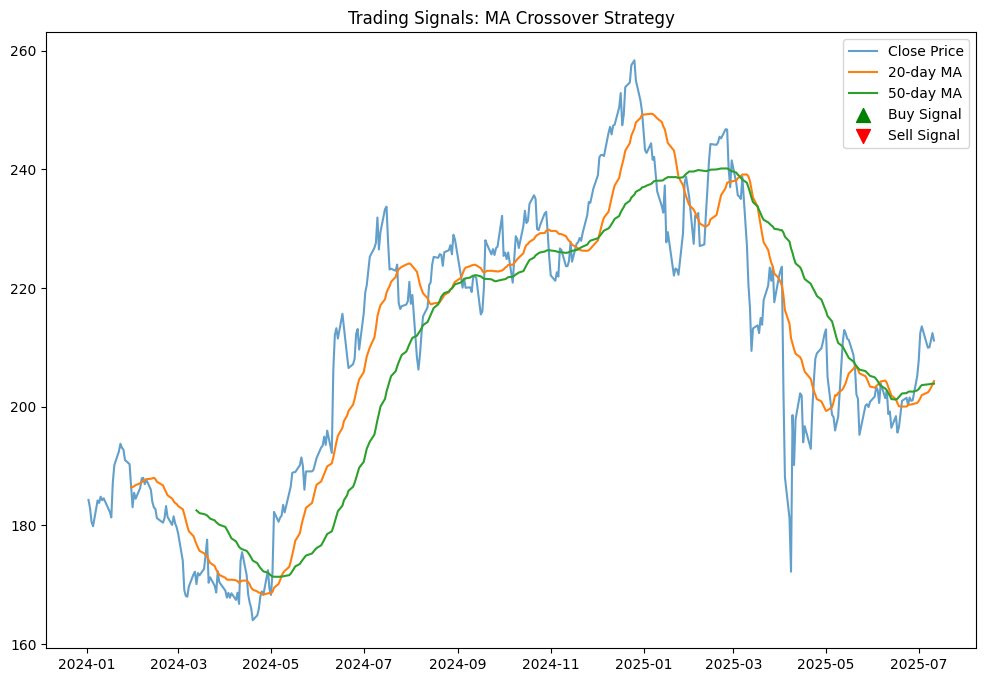

In [3]:
# Get data
stock = yf.download('AAPl', start= '2024-01-01', end= '2025-07-14')

# Calculate Moving Averages
stock['MA_20'] = stock['Close'].rolling(window=20).mean()
stock['MA_50'] = stock['Close'].rolling(window=50).mean()

# Creating trading signals
stock['Signal'] = 0
stock['Signal'][stock['MA_20'] > stock['MA_50']] = 1
stock['Signal'][stock['MA_20'] <= stock['MA_50']] = -1

# Plot with signals
plt.figure(figsize = (12,8))
plt.plot(stock['Close'], label= 'Close Price', alpha=0.7)
plt.plot(stock['MA_20'], label='20-day MA')
plt.plot(stock['MA_50'], label= '50-day MA')

# Mark buy/sell signals
buy_signals = stock[stock['Signal'] == 1]
sell_signals = stock[stock['Signal'] == -1]

plt.scatter(buy_signals.index, buy_signals['Close'], color= 'green', marker= '^', s=100, label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'], color='red', marker='v', s=100, label='Sell Signal')

plt.legend()
plt.title('Trading Signals: MA Crossover Strategy')
plt.show()